FUNCTION IMPORTATION

In [8]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

DATA INPUT AND CLEANING

In [14]:
# Import the data
df = pd.read_csv('/Users/elvisechefu/Desktop/language detection/languages.csv')

X = df['text']
y = df['language']

# Tokenization
def tokenize(text):
    return nltk.word_tokenize(text)

# Removing Stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(words):
    return [word for word in words if word not in stop_words]


PRE-PROCESSING

In [15]:
# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    words = tokenize(text)
    words = remove_stopwords(words)
    return ' '.join(words)


PIPELINE

In [16]:
# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)

In [17]:
# Create a pipeline with Logistic Regression model
pipeline = Pipeline([
    ('preprocess', FunctionTransformer(lambda x:  [preprocess(text) for text in x])),
    ('vectorizer', vectorizer),
    ('classifier', LogisticRegression(max_iter=1000))  # Increase max_iter
])

DATASET SPLIT: TRAIN, VALIDATE AND TEST

In [18]:
# Split data into training and combined validation/test sets
X_train_combined, X_val_test, y_train_combined, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split combined validation/test set into separate validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [19]:
# Split the data into features (X) and target labels (y)
X = df['text']
y = df['language']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Print the shapes of the resulting sets
print("Shape of X_train_combined:", X_train_combined.shape)
print("Shape of y_train_combined:", y_train_combined.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_combined: (610947,)
Shape of y_train_combined: (610947,)
Shape of X_val: (76368,)
Shape of y_val: (76368,)
Shape of X_test: (152737,)
Shape of y_test: (152737,)


TRAIN THE CREATED PIPELINE

In [21]:
# Train the pipeline
pipeline.fit(X_train, y_train)

# Predictions
#y_pred = pipeline.predict(X_test)


Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function <lambda> at 0x177c07ba0>)),
                ('vectorizer', TfidfVectorizer(max_features=1000)),
                ('classifier', LogisticRegression(max_iter=1000))])

PREDICT LABLES OF THE TRAINIG SET

In [22]:
# Predict labels for the training set
y_train_pred = pipeline.predict(X_train_combined)

In [23]:
# Compute accuracy
train_accuracy = accuracy_score(y_train_combined, y_train_pred)
print("Train Accuracy:", train_accuracy)

Train Accuracy: 0.9764087555876368


METRICS OF THE TRAIN SET: ACCURACY, RECALL, PRECISION AND F1-SCORE

In [24]:
# Compute accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

# Compute precision
precision = precision_score(y_train, y_train_pred, average='weighted')
print("Precision:", precision)

# Compute recall
recall = recall_score(y_train, y_train_pred, average='weighted')
print("Recall:", recall)

# Compute F1-score for the test set
f1_test = f1_score(y_train, y_train_pred, average='weighted')
print("F1-score (Test):", f1_test)

Train Accuracy: 0.9764087555876368
Precision: 0.9767283573294931
Recall: 0.9764087555876368
F1-score (Test): 0.9763380947485456


METRICS OF THE VALIDATION SET: ACCURACY, RECALL, PRECISION AND F1-SCORE

In [25]:
# Predict labels for the validation set
y_val_pred = pipeline.predict(X_val)

# Compute accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Compute precision
precision = precision_score(y_val, y_val_pred, average='weighted')
print("Precision:", precision)

# Compute recall
recall = recall_score(y_val, y_val_pred, average='weighted')
print("Recall:", recall)

# Compute F1-score for the test set
f1_test = f1_score(y_val, y_val_pred, average='weighted')
print("F1-score (Test):", f1_test)

Validation Accuracy: 0.9770715482924786
Precision: 0.9774137935969591
Recall: 0.9770715482924786
F1-score (Test): 0.9770104438850237


METRICS OF THE TEST SET: ACCURACY, RECALL, PRECISION AND F1-SCORE

In [26]:
# Predict labels for the test set
y_test_pred = pipeline.predict(X_test)

# Compute accuracy for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Compute precision for the test set
precision_test = precision_score(y_test, y_test_pred, average='weighted')
print("Precision (Test):", precision_test)

# Compute recall for the test set
recall_test = recall_score(y_test, y_test_pred, average='weighted')
print("Recall (Test):", recall_test)

# Compute F1-score for the test set
f1_test = f1_score(y_test, y_test_pred, average='weighted')
print("F1-score (Test):", f1_test)


Test Accuracy: 0.9767181494988116
Precision (Test): 0.9770659247928373
Recall (Test): 0.9767181494988116
F1-score (Test): 0.9766558867173853


In [27]:
# Evaluate
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)

LEARNING CURVE

In [28]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to calculate performance metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1


# Define a function to plot learning curves
def plot_learning_curves(train_sizes, train_scores, val_scores, test_scores, metric):
    plt.plot(train_sizes, train_scores, label='Train')
    plt.plot(train_sizes, val_scores, label='Validation')
    plt.plot(train_sizes, test_scores, label='Test')
    plt.xlabel('Training Size')
    plt.ylabel(metric)
    plt.title(f'Learning Curve - {metric}')
    plt.legend()
    plt.show()

# Define a function to train the model with varying training sizes
def train_with_varying_sizes(X_train, y_train, X_val, y_val, X_test, y_test, sizes):
    train_accuracies, val_accuracies, test_accuracies = [], [], []
    train_precisions, val_precisions, test_precisions = [], [], []
    train_recalls, val_recalls, test_recalls = [], [], []
    train_f1s, val_f1s, test_f1s = [], [], []

    for size in sizes:
        X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
        pipeline.fit(X_train_subset, y_train_subset)

        y_train_pred = pipeline.predict(X_train_subset)
        y_val_pred = pipeline.predict(X_val)
        y_test_pred = pipeline.predict(X_test)
        
        train_accuracy, train_precision, train_recall, train_f1 = calculate_metrics(y_train_subset, y_train_pred)
        val_accuracy, val_precision, val_recall, val_f1 = calculate_metrics(y_val, y_val_pred)
        test_accuracy, test_precision, test_recall, test_f1 = calculate_metrics(y_test, y_test_pred)
        
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        test_accuracies.append(test_accuracy)

        train_precisions.append(train_precision)
        val_precisions.append(val_precision)
        test_precisions.append(test_precision)

        train_recalls.append(train_recall)
        val_recalls.append(val_recall)
        test_recalls.append(test_recall)

        train_f1s.append(train_f1)
        val_f1s.append(val_f1)
        test_f1s.append(test_f1)
        
    return (train_accuracies, val_accuracies, test_accuracies), \
           (train_precisions, val_precisions, test_precisions), \
           (train_recalls, val_recalls, test_recalls), \
           (train_f1s, val_f1s, test_f1s)
    
# Define the sizes of the training subsets
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Train the model with varying training sizes
accuracy_scores, precision_scores, recall_scores, f1_scores = train_with_varying_sizes(X_train_combined, y_train_combined, X_val, y_val, X_test, y_test, train_sizes)

PLOTING THE VARIOUS LEARNING CURVES 

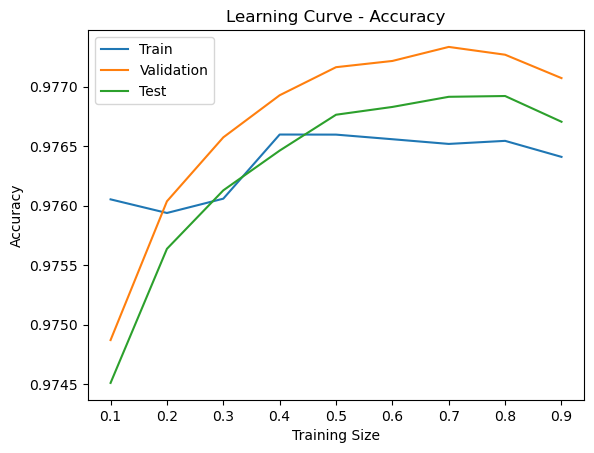

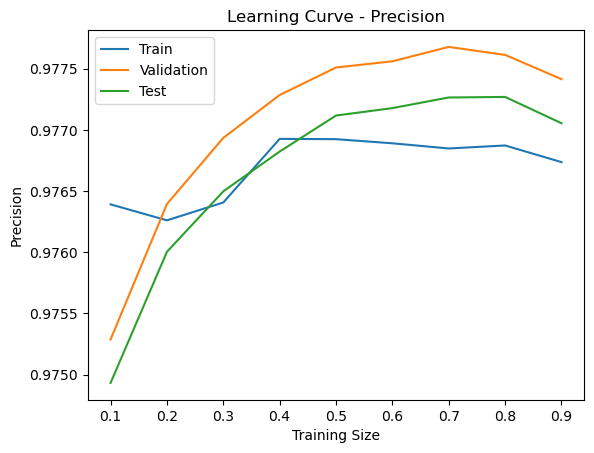

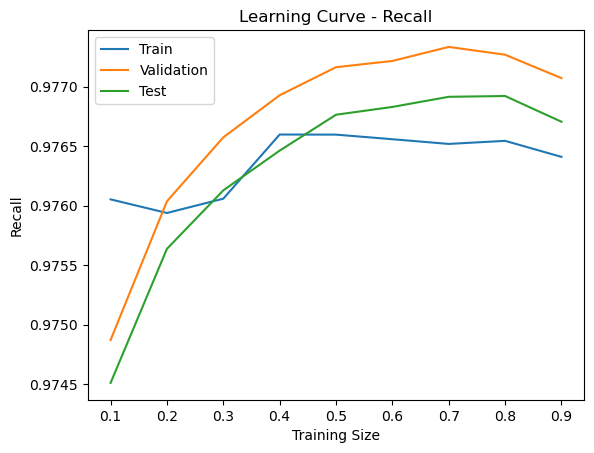

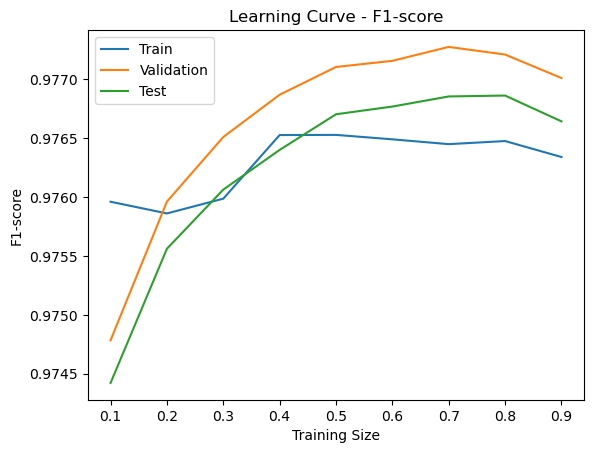

In [29]:
# Plot learning curves for each metric
plot_learning_curves(train_sizes, accuracy_scores[0], accuracy_scores[1], accuracy_scores[2], 'Accuracy')
plot_learning_curves(train_sizes, precision_scores[0], precision_scores[1], precision_scores[2], 'Precision')
plot_learning_curves(train_sizes, recall_scores[0], recall_scores[1], recall_scores[2], 'Recall')
plot_learning_curves(train_sizes, f1_scores[0], f1_scores[1], f1_scores[2], 'F1-score')

BASIC TESTING

FRENCH

In [30]:
# Predict language for a new text
text_to_predict = "C'est une bonne journée pour apprendre le français."
preprocessed_text = preprocess(text_to_predict)
predicted_language = pipeline.predict([preprocessed_text])[0]

print("Predicted Language:", predicted_language)

Predicted Language: french


ENGLISH

In [31]:
# Predict language for a new text
text_to_predict = "Wow that is a very big shark, is it edible ?, I don't know?"
preprocessed_text = preprocess(text_to_predict)
predicted_language = pipeline.predict([preprocessed_text])[0]

print("Predicted Language:", predicted_language)

# Evaluate the model performance
print("\nModel Evaluation:")
print("Test Accuracy:", test_accuracy)
print("Precision (Test):", precision_test)
print("Recall (Test):", recall_test)
print("F1-score (Test):", f1_test)


Predicted Language: english

Model Evaluation:
Test Accuracy: 0.9767181494988116
Precision (Test): 0.9770659247928373
Recall (Test): 0.9767181494988116
F1-score (Test): 0.9766558867173853


GERMAN

In [32]:
# Predict language for a new text
text_to_predict = "Die Komplexität der globalen Finanzmärkte erfordert eine differenzierte Analyse und ein tiefgreifendes Verständnis der wirtschaftlichen Zusammenhänge. Investoren müssen sowohl makroökonomische Trends als auch mikroökonomische Variablen berücksichtigen, um fundierte Entscheidungen zu treffen und Risiken zu minimieren."
preprocessed_text = preprocess(text_to_predict)
predicted_language = pipeline.predict([preprocessed_text])[0]

print("Predicted Language:", predicted_language)


Predicted Language: german


SPANISH

In [ ]:
# Predict language for a new text
text_to_predict = "Hola, ¿cómo estás? Estoy bien, gracias. ¿Y tú? Me gustaría ir al parque esta tarde."
preprocessed_text = preprocess(text_to_predict)
predicted_language = pipeline.predict([preprocessed_text])[0]

print("Predicted Language:", predicted_language)

MULTIPLE LANGUAGE DETETCION IN A SENTENCE

In [33]:
#importing the functions
from langdetect import detect_langs
from langdetect import detect


# Function to predict languages in a text
def predict_languages(text):
    langs = detect_langs(text)
    predictions = {}
    for lang in langs:
        predictions[lang.lang] = lang.prob
    return predictions


TESTING

In [34]:
# Example text containing multiple languages
text_to_predict = "C'est une bonne journée pour apprendre le français. Today is a good day to learn English."

# Predict languages in the text
language_predictions = predict_languages(text_to_predict)

# Display predicted languages
print("Predicted Languages:")
for lang, prob in language_predictions.items():
    print(f"- {lang}: {prob}")

Predicted Languages:
- fr: 0.999996469589985


IDENTIFYING LANGUAGE SEGMENTS 

In [39]:
# Function to predict languages in a text and identify language segments
def predict_languages_with_segments(text):
    segments = []
    current_lang = None
    current_segment = ""
    
    # Split the text into sentences or paragraphs
    sentences = text.split('.')
    for sentence in sentences:
        sentence = sentence.strip()
        # Check if the sentence contains enough characters for language detection
        if len(sentence) > 3:  # Adjust the threshold as needed
            # Predict the language of the sentence
            lang = detect(sentence)
            if lang != current_lang:
                # If the language changes, add the previous segment to the list
                if current_segment.strip():
                    segments.append((current_lang, current_segment.strip()))
                # Start a new segment with the new language
                current_segment = sentence
                current_lang = lang
            else:
                # Add the sentence to the current segment
                current_segment += ". " + sentence
    # Append the last segment
    if current_segment.strip():
        segments.append((current_lang, current_segment.strip()))
    
    return segments

TESTING ON BI-LINGUAL SENTENCES
English and French

In [40]:
# Example text containing multiple languages
text_to_predict = "C'est une bonne journée pour apprendre le français. Today is a good day to learn English."

# Predict languages and identify language segments in the text
language_segments = predict_languages_with_segments(text_to_predict)

# Display language segments
print("Language Segments:")
for lang, segment in language_segments:
    print(f"- {lang}: {segment}")

Language Segments:
- fr: C'est une bonne journée pour apprendre le français
- en: Today is a good day to learn English


TESTING ON MULTI-LINGUAL SENTENCES

In [41]:
# Example text containing multiple languages
text_to_predict = "Bonjour! Heute ist ein schöner Tag. Let's go for a walk in the park. Je voudrais un café, bitte."

# Predict languages and identify language segments in the text
language_segments = predict_languages_with_segments(text_to_predict)

# Display language segments
print("Language Segments:")
for lang, segment in language_segments:
    print(f"- {lang}: {segment}")

Language Segments:
- de: Bonjour! Heute ist ein schöner Tag
- en: Let's go for a walk in the park
- fr: Je voudrais un café, bitte


In [42]:
# Example text containing multiple languages
text_to_predict = "I love eating croissants and drinking café au lait in Paris."

# Predict languages and identify language segments in the text
language_segments = predict_languages_with_segments(text_to_predict)

# Display language segments
print("Language Segments:")
for lang, segment in language_segments:
    print(f"- {lang}: {segment}")

Language Segments:
- fr: I love eating croissants and drinking café au lait in Paris
